In [6]:
import pandas as pn
import matplotlib.pyplot as plt

In [34]:
data = pn.read_csv("../data/rmse_df_1218_map.csv")
datagb = data.groupby(["privacy"])["rmse"].quantile([.1,.25,.5,.75,0.9]).reset_index()
datagb2 = data.groupby(["nclasses"])["rmse"].quantile([.1,.25,.5,.75,0.9]).reset_index()

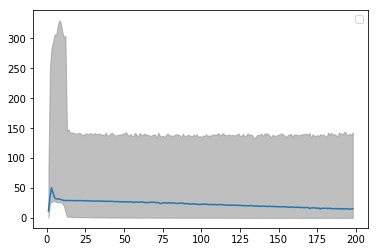

In [33]:
%matplotlib inline
fig, ax = plt.subplots()
labels = []
x = datagb.privacy.unique()
y1 = datagb.query("level_1 == .25")["rmse"]
y2 = datagb.query("level_1 == .5")["rmse"]
y3 = datagb.query("level_1 == .75")["rmse"]
lines, _ = ax.get_legend_handles_labels()
ax.fill_between(x, y1, y3, color='grey', alpha='0.5')
ax.plot(x,y2)
ax.legend(lines, labels, loc='best')
plt.show()


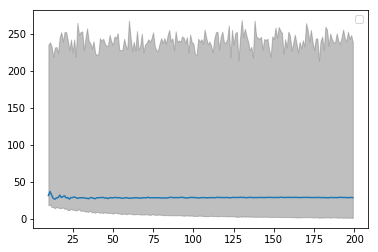

In [36]:
%matplotlib inline
fig, ax = plt.subplots()
labels = []
x = datagb2.nclasses.unique()
y1 = datagb2.query("level_1 == .25")["rmse"]
y2 = datagb2.query("level_1 == .5")["rmse"]
y3 = datagb2.query("level_1 == .75")["rmse"]
lines, _ = ax.get_legend_handles_labels()
ax.fill_between(x, y1, y3, color='grey', alpha='0.5')
ax.plot(x,y2)
ax.legend(lines, labels, loc='best')
plt.show()

In [56]:
%matplotlib inline
def plot_params(gb_param,pt=None, real=None, uniform=None, uniform_original=None):
    data_f = data.query("privacy < {pt}".format(pt=pt)) if pt is not None else data
    data_f = data_f.query("real=={real}".format(real=real)) if real is not None else data_f
    data_f = data_f.query("uniform=={uniform}".format(uniform=uniform)) if uniform is not None else data_f
    data_f = data_f.query("uniform_original=='{uniform_original}'".format(uniform_original=uniform_original)) if uniform_original is not None else data_f
    gb = data_f.groupby([gb_param])["rmse"].quantile([.1,.25,.5,.75,0.9]).reset_index()
    fig, ax = plt.subplots()
    labels = []
    x = gb[gb_param].unique()
    y1 = gb.query("level_1 == .25")["rmse"]
    y2 = gb.query("level_1 == .5")["rmse"]
    y3 = gb.query("level_1 == .75")["rmse"]
    lines, _ = ax.get_legend_handles_labels()
    ax.fill_between(x, y1, y3, color='grey', alpha='0.5')
    ax.plot(x,y2)
    ax.legend(lines, labels, loc='best')
    tt = gb_param + ", real=" + str(real) + ", uniform="+str(uniform) + ", uo=" + str(uniform_original)
    ax.set_title(tt)
    plt.show()


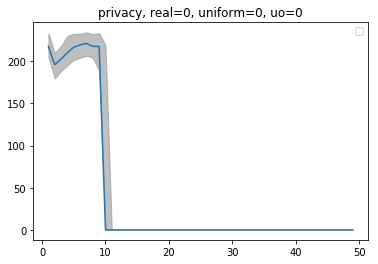

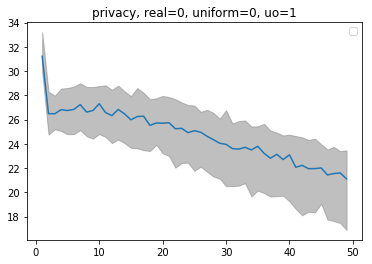

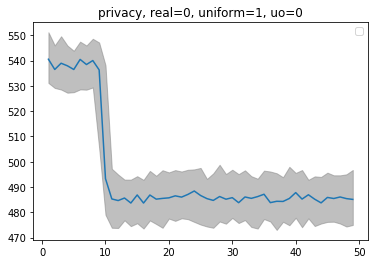

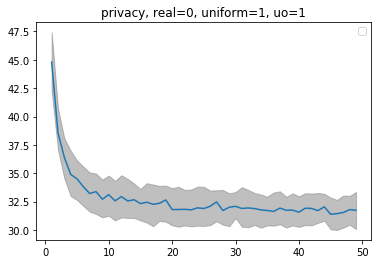

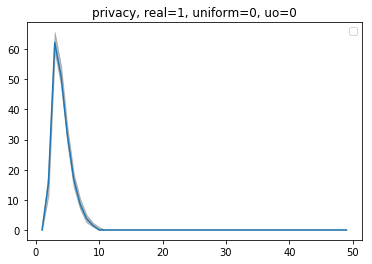

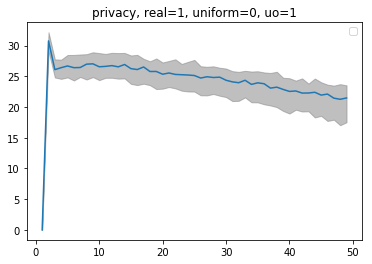

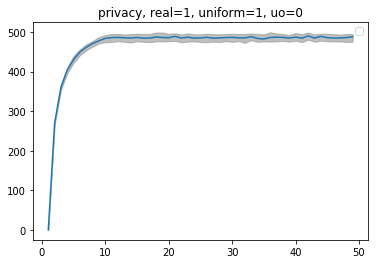

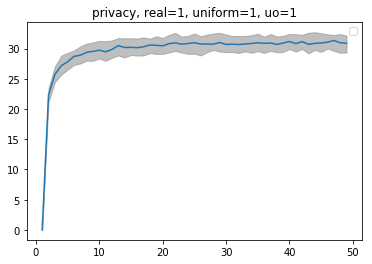

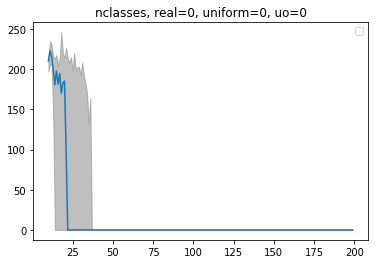

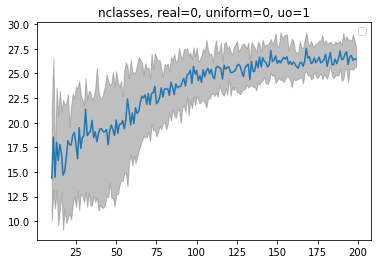

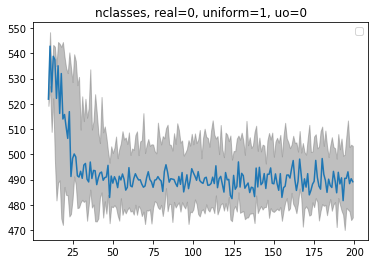

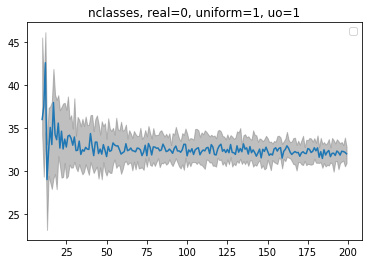

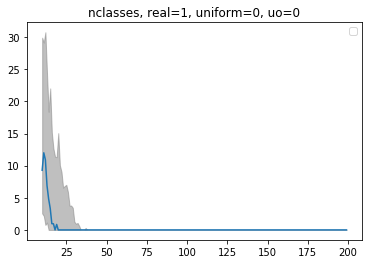

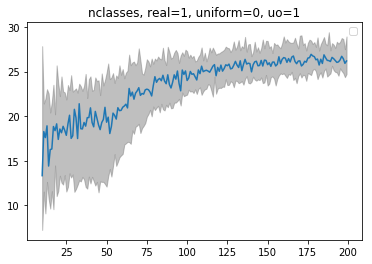

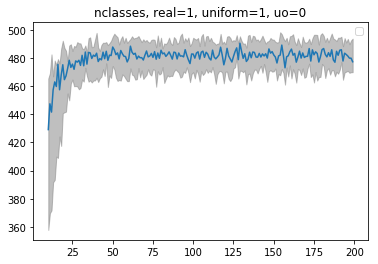

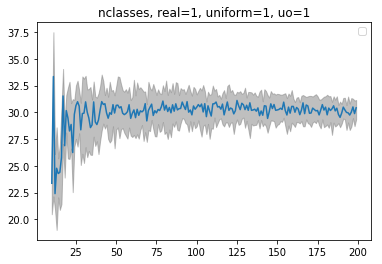

In [57]:
for param_gb in ["privacy", "nclasses"]:
    for real in [0,1]:
        for uniform in [0,1]:
            for uniform_original in [0,1]:
                plot_params(param_gb,50, real, uniform, uniform_original)